<a href="https://colab.research.google.com/github/proBIKRAM/AI-Lab-Bikram/blob/main/goal_based_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal Based Agent-Vacuum Cleaner**

## All Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import heapq

## Grid setup

In [ ]:
ROWS, COLS = 8, 8
grid = np.random.choice([0, 1], size=(ROWS, COLS), p=[0.7, 0.3])
was_dirty = grid.copy()
start_row, start_col = 2, 2
agent_pos = [start_row, start_col]

## Directions


In [ ]:
DIRS_4 = [(-1,0),(1,0),(0,-1),(0,1)]
DIRS_8 = [(-1,-1),(-1,0),(-1,1),
          ( 0,-1),       ( 0,1),
          ( 1,-1),( 1,0),( 1,1)]

## Huristics

In [ ]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

## Draw grid

In [ ]:
def draw_grid(agent_pos):
    clear_output(wait=True)
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for r in range(ROWS):
        for c in range(COLS):
            if (r, c) == tuple(agent_pos):
                color = 'blue'
            elif grid[r][c] == 1:
                color = 'gray'
            elif was_dirty[r][c] == 1:
                color = 'green'
            else:
                color = 'white'
            ax.add_patch(plt.Rectangle((c, ROWS - r - 1), 1, 1, facecolor=color, edgecolor='black'))
            plt.text(c + 0.35, ROWS - r - 0.6, str(grid[r][c]), fontsize=12)

    plt.xlim(0, COLS)
    plt.ylim(0, ROWS)
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

## A* pathfinding

In [ ]:
def a_star(start, goal):
    open_set = [(heuristic(start, goal), 0, start)]
    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, cost, current = heapq.heappop(open_set)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for dr, dc in DIRS_4:
            nr, nc = current[0]+dr, current[1]+dc
            if 0 <= nr < ROWS and 0 <= nc < COLS:
                neighbor = (nr, nc)
                tentative_g = g_score[current] + 1
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    heapq.heappush(open_set, (tentative_g + heuristic(neighbor, goal), tentative_g, neighbor))

    return []

# Find nearest dirty cell


In [ ]:
def find_nearest_dirty():
    min_dist = float('inf')
    target = None
    for r in range(ROWS):
        for c in range(COLS):
            if grid[r][c] == 1:
                d = heuristic(agent_pos, (r, c))
                if d < min_dist:
                    min_dist = d
                    target = (r, c)
    return target

## Visualization

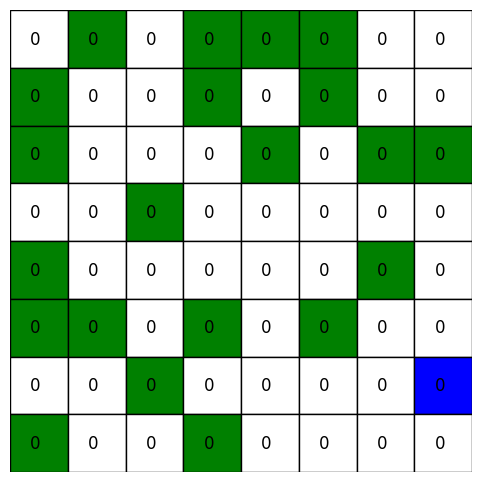

Text(0.5, 1.0, 'Cleaning Complete!')

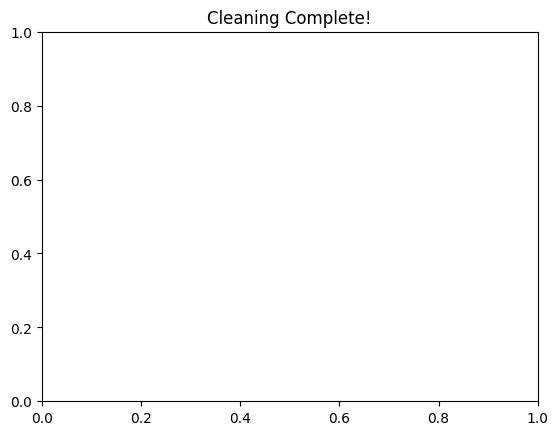

In [49]:
while np.any(grid == 1):
    r, c = agent_pos
    draw_grid(agent_pos)
    time.sleep(0.4)

    if grid[r][c] == 1:
        grid[r][c] = 0

    moved = False
    for dr, dc in DIRS_8:
        nr, nc = r + dr, c + dc
        if 0 <= nr < ROWS and 0 <= nc < COLS and grid[nr][nc] == 1:
            agent_pos = [nr, nc]
            moved = True
            break

    if not moved:
        goal = find_nearest_dirty()
        if goal:
            path = a_star(tuple(agent_pos), goal)
            if path:
                agent_pos = list(path[0])

draw_grid(agent_pos)
plt.title("Cleaning Complete!")

# RESET the grid to new mess before re-running



In [48]:
grid = np.random.choice([0, 1], size=(ROWS, COLS), p=[0.7, 0.3])
was_dirty = grid.copy()
agent_pos = [start_row, start_col]